In [18]:
import read_files, manage_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
path_to_folder = "/eos/user/j/jcapotor/FBGdata/Data/27012023_StabilityTests/"
files = ["3"]


Filling Run3
Downsampling peaks/temperature ...
Processed Temperature
Downsampling peaks/temperature ...
Downsampling peaks/temperature ...
Processed peaks
Downsampling spectrum...
Downsampling spectrum...


Text(0.5, 0.98, 'Offset evolution over time')

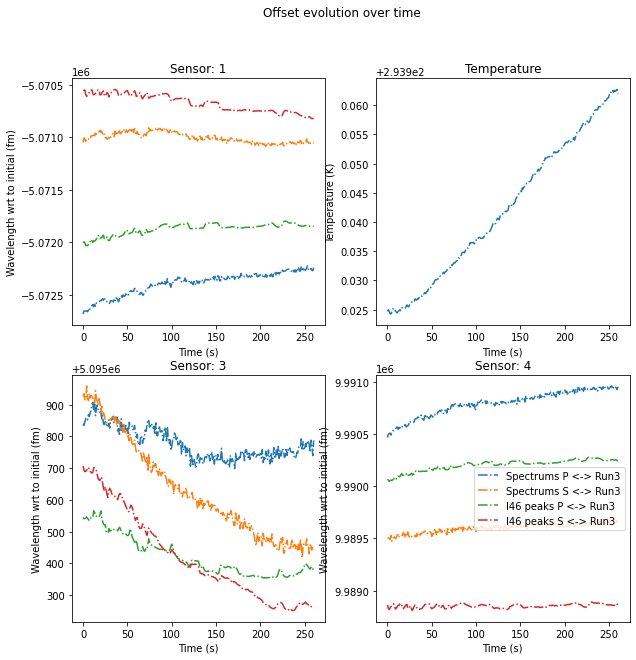

In [20]:
amp_results = {}
wav_results = {}
fwhm_results = {}
plt.figure(constrained_layout=False, figsize=(10,10))
for file in files:
    print("Filling Run" + file)
    temp = read_files.read_temperature(path_to_folder + "temperature_Run"+file+".txt")
    temp = manage_data.process_data(temp)
    peaks = read_files.read_peaks(path_to_folder + "peaks_Run"+file+".txt")
    peaks_p, peaks_s, peaks_p_full, peaks_s_full = manage_data.process_data(peaks)
    spectrums = read_files.read_spectrums(path_to_folder + "spectrums_Run"+file+".txt", [0])
    spectrums_p, spectrums_s, spectrums_p_full, spectrums_s_full = manage_data.process_data(spectrums)
    spectrums_p, peaks_p = manage_data.match_dataframes(spectrums_p, peaks_p)
    spectrums_p, temp_p = manage_data.match_dataframes(spectrums_p, temp)
    peaks_p, temp_p = manage_data.match_dataframes(peaks_p, temp_p)

    spectrums_s, peaks_s = manage_data.match_dataframes(spectrums_s, peaks_s)
    spectrums_s, temp_s = manage_data.match_dataframes(spectrums_s, temp)
    peaks_s, temp_s = manage_data.match_dataframes(peaks_s, temp_s)

    # amp_results["Run"+file] = {}
    # wav_results["Run"+file] = {}
    # fwhm_results["Run"+file] = {}
    # for variable in ["Wav1-1", "Wav1-2", "Wav1-3", "Wav1-4"]:
    #     amp_results["Run"+file]["specs_P_"+variable+"_amp (AU)"] = str(np.round(np.mean(spectrums_p[variable+"_amp"]), 0)) + " +- " + str(np.round(np.std(spectrums_p[variable+"_amp"]),0))
    #     wav_results["Run"+file]["peaks_P_"+variable] = str(np.round(np.mean(peaks_p[variable]*1e9), 6)) + " +- " + str(np.round(np.std(peaks_p[variable]*1e12), 3)) + " pm"
    #     wav_results["Run"+file]["specs_P_"+variable] = str(np.round(np.mean(spectrums_p[variable]), 6)) + " +- " + str(np.round(np.std(spectrums_p[variable]*1e3), 3)) + " pm"
    #     fwhm_results["Run"+file]["specs_P_"+variable+"_sigma"] = str(np.round(np.mean(spectrums_p[variable+"_sigma"]*1e3), 3)) + " +- " + str(np.round(np.std(spectrums_p[variable+"_sigma"]*1e3), 3)) + " pm"
    # amp_results["Run"+file]["Temp1 (K)"] = str(np.round(np.mean(temp["T1"]), 3)) + " +- " + str(np.round(np.std(temp["T1"])*1e3, 0)) + " mK"
    # amp_results["Run"+file]["Temp2 (K)"] = str(np.round(np.mean(temp["T2"]), 3)) + " +- " + str(np.round(np.std(temp["T2"])*1e3, 0)) + " mK"
    # wav_results["Run"+file]["Temp1 (K)"] = str(np.round(np.mean(temp["T1"]), 3)) + " +- " + str(np.round(np.std(temp["T1"])*1e3, 0)) + " mK"
    # wav_results["Run"+file]["Temp2 (K)"] = str(np.round(np.mean(temp["T2"]) , 3)) + " +- " + str(np.round(np.std(temp["T2"])*1e3, 0)) + " mK"
    # fwhm_results["Run"+file]["Temp1 (K)"] = str(np.round(np.mean(temp["T1"]), 3)) + " +- " + str(np.round(np.std(temp["T1"])*1e3, 0)) + " mK"
    # fwhm_results["Run"+file]["Temp2 (K)"] = str(np.round(np.mean(temp["T2"]), 3)) + " +- " + str(np.round(np.std(temp["T2"])*1e3, 0)) + " mK"

    for i in range(1,5):
        plt.subplot(2,2,i)
        if i == 2:
            plt.plot(
                temp_p["Timestamp"]-temp_p["Timestamp"][0],
                temp_p["T1"],
                "-.",
                label="RTD1"
            )
            plt.xlabel("Time (s)")
            plt.ylabel("Temperature (K)")
            plt.title("Temperature")
        else:
            plt.xlabel("Time (s)")
            plt.ylabel("Wavelength wrt to initial (fm)")
            plt.title("Sensor: " + str(i))
            plt.plot(spectrums_p["Timestamp"]-spectrums_p["Timestamp"][0],
                    (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-2"])*1e6,
                    "-.",
                    # xerr=temp_p["T1_err"], yerr=spectrums_p["Wav1-"+str(i)+"_err"]*1e6, fmt=".",
                    label="Spectrums P <-> Run" + file
            )
            plt.plot(spectrums_s["Timestamp"]-spectrums_s["Timestamp"][0],
                    (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-2"])*1e6,
                    "-.",
                    # xerr=temp_p["T1_err"], yerr=spectrums_p["Wav1-"+str(i)+"_err"]*1e6, fmt=".",
                    label="Spectrums S <-> Run" + file
            )
            plt.plot(peaks_p["Timestamp"]-peaks_p["Timestamp"][0],
                    (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-2"])*1e15,
                    "-.",
                    # xerr=temp_p["T1_err"], yerr=peaks_p["Wav1-"+str(i)+"_err"]*1e15, fmt=".",
                    label="I46 peaks P <-> Run" + file
            )
            plt.plot(peaks_s["Timestamp"]-peaks_s["Timestamp"][0],
                    (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-2"])*1e15,
                    "-.",
                    # xerr=temp_p["T1_err"], yerr=peaks_p["Wav1-"+str(i)+"_err"]*1e15, fmt=".",
                    label="I46 peaks S <-> Run" + file
            )
plt.legend()
plt.suptitle("Offset evolution over time")

In [8]:
def line(x, A, B):
    return A + B*x

Text(0.5, 0.98, 'Offset evolution over temperature - S polarisation')

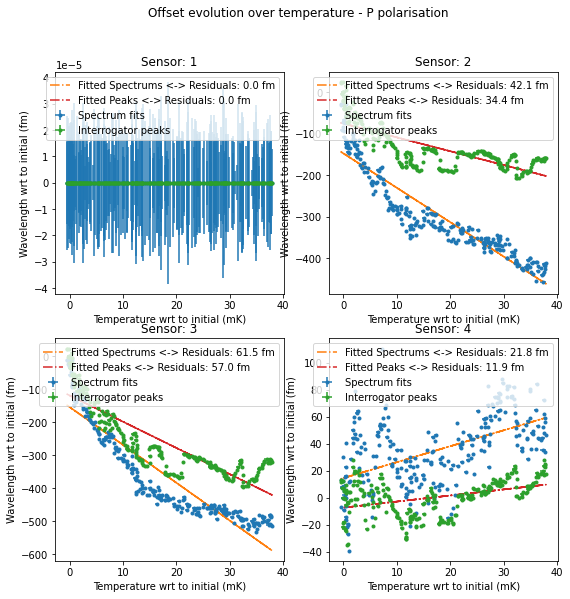

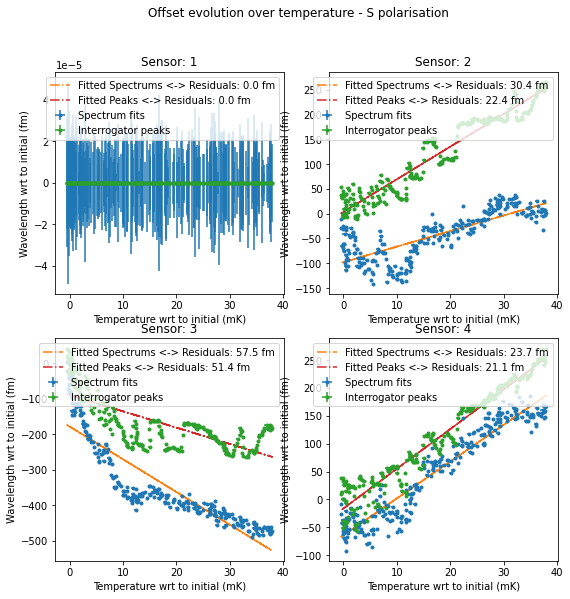

In [21]:
from scipy.optimize import curve_fit

plt.figure(constrained_layout=False, figsize=(9,9))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.xlabel("Temperature wrt to initial (mK)")
    plt.ylabel("Wavelength wrt to initial (fm)")
    plt.title("Sensor: " + str(i))
    popt, pcov = curve_fit(line, temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3, (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])*1e6 - (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])[0]*1e6)
    plt.errorbar(temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3,
            (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])*1e6 - (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])[0]*1e6,
            xerr=temp_p["T1_err"]*1e3, yerr=spectrums_p["Wav1-"+str(i)+"_err"], fmt=".",
            label="Spectrum fits")
    plt.plot(
        temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3,
        line(temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3, popt[0], popt[1]),
        "-.",
        label="Fitted Spectrums <-> Residuals: " + str(np.round(np.std((spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])*1e6 - (spectrums_p["Wav1-"+str(i)] - spectrums_p["Wav1-1"])[0]*1e6 - line(temp["T1"]*1e3 - temp["T1"][0]*1e3, popt[0], popt[1])),1)) + " fm"
    )
    popt, pcov = curve_fit(line, temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3, (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])*1e15 - (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])[0]*1e15)
    plt.errorbar(
        temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3,
        (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])*1e15 - (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])[0]*1e15,
        xerr=temp_p["T1_err"]*1e3, yerr=peaks_p["Wav1-"+str(i)+"_err"], fmt=".",
        label="Interrogator peaks"
        )
    plt.plot(
        temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3,
        line(temp_p["T1"]*1e3 - temp_p["T1"][0]*1e3, popt[0], popt[1]),
        "-.",
        label="Fitted Peaks <-> Residuals: " + str(np.round(np.std((peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])*1e15 - (peaks_p["Wav1-"+str(i)] - peaks_p["Wav1-1"])[0]*1e15 - line(temp["T1"]*1e3 - temp["T1"][0]*1e3, popt[0], popt[1])),1)) + " fm"
    )
    plt.legend()
plt.suptitle("Offset evolution over temperature - P polarisation")

plt.figure(constrained_layout=False, figsize=(9,9))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.xlabel("Temperature wrt to initial (mK)")
    plt.ylabel("Wavelength wrt to initial (fm)")
    plt.title("Sensor: " + str(i))
    popt, pcov = curve_fit(line, temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])*1e6 - (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])[0]*1e6)
    plt.errorbar(temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3,
            (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])*1e6 - (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])[0]*1e6,
            xerr=temp_s["T1_err"]*1e3, yerr=spectrums_s["Wav1-"+str(i)+"_err"], fmt=".",
            label="Spectrum fits")
    plt.plot(
        temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3,
        line(temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, popt[0], popt[1]),
        "-.",
        label="Fitted Spectrums <-> Residuals: " + str(np.round(np.std((spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])*1e6 - (spectrums_s["Wav1-"+str(i)] - spectrums_s["Wav1-1"])[0]*1e6 - line(temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, popt[0], popt[1])),1)) + " fm"
    )
    popt, pcov = curve_fit(line, temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])*1e15 - (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])[0]*1e15)
    plt.errorbar(
        temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3,
        (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])*1e15 - (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])[0]*1e15,
        xerr=temp_s["T1_err"]*1e3, yerr=peaks_s["Wav1-"+str(i)+"_err"], fmt=".",
        label="Interrogator peaks"
        )
    plt.plot(
        temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3,
        line(temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, popt[0], popt[1]),
        "-.",
        label="Fitted Peaks <-> Residuals: " + str(np.round(np.std((peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])*1e15 - (peaks_s["Wav1-"+str(i)] - peaks_s["Wav1-1"])[0]*1e15 - line(temp_s["T1"]*1e3 - temp_s["T1"][0]*1e3, popt[0], popt[1])),1)) + " fm"
    )
    plt.legend()
plt.suptitle("Offset evolution over temperature - S polarisation")

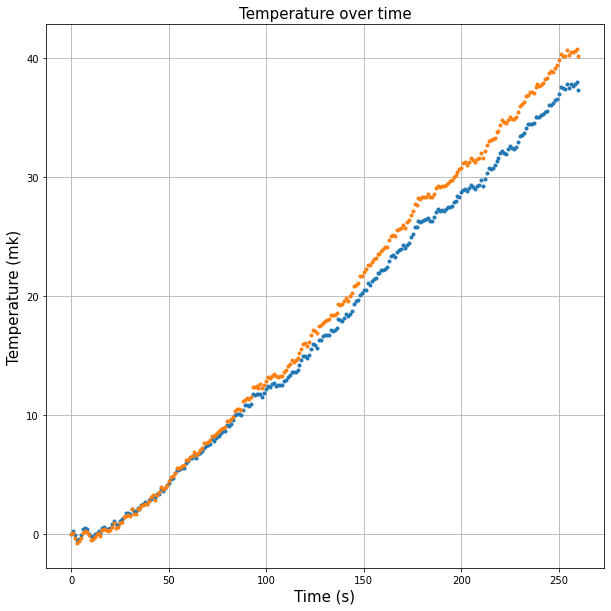

In [5]:
plt.figure(figsize=(10,10))
plt.plot(temp_p["Timestamp"] - temp_p["Timestamp"][0], (temp_p["T1"] - temp_p["T1"][0])*1000, ".")
plt.plot(temp_p["Timestamp"] - temp_p["Timestamp"][0], (temp_p["T2"] - temp_p["T2"][0])*1000, ".")
plt.title("Temperature over time", fontsize=15)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Temperature (mk)", fontsize=15)
plt.grid("on")